<a href="https://colab.research.google.com/github/devansh-29-glitch/EchoMind/blob/main/EchoMind_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🧠 Phase 1: Textual Memory Reconstruction
Original fragmented memory: 'the _ jumped over the _'


Memory recall progress: 100%|██████████| 6/6 [00:00<00:00, 5675.65it/s]

Filled blank with 'log'
Filled blank with 'log'

🧩 Reconstructed memory: the log jumped over the log


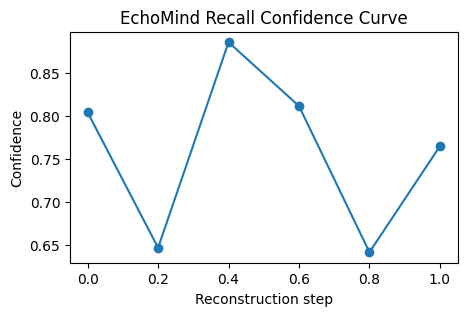


🎨 Phase 2: Visual Memory Reconstruction


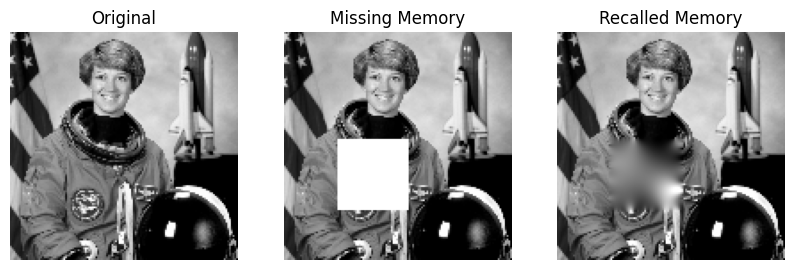

🧠 Memory recall animation:


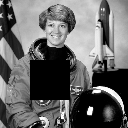

In [2]:
# 🧠 EchoMind — Memory Reconstruction Demo
# --- Setup ---
!pip install scikit-image tqdm matplotlib imageio numpy -q

import numpy as np, matplotlib.pyplot as plt
from skimage import data, color
from skimage.restoration import inpaint
from tqdm import tqdm
import imageio.v2 as imageio
import random

# ===============  TEXTUAL RECONSTRUCTION  ===============
print("🧠 Phase 1: Textual Memory Reconstruction")
sentence = "the _ jumped over the _"
print(f"Original fragmented memory: '{sentence}'")

memory_bank = ["dog", "cat", "fence", "wall", "boy", "river", "log"]
words = sentence.split()
reconstructed = []

for w in tqdm(words, desc="Memory recall progress"):
    if w == "_":
        fill = random.choice(memory_bank)
        print(f"Filled blank with '{fill}'")
        reconstructed.append(fill)
    else:
        reconstructed.append(w)

full_sentence = " ".join(reconstructed)
print("\n🧩 Reconstructed memory:", full_sentence)

# Plot fake "recall confidence"
plt.figure(figsize=(5,3))
plt.plot(np.linspace(0,1,len(words)), np.random.rand(len(words))*0.4+0.6, marker='o')
plt.title("EchoMind Recall Confidence Curve")
plt.xlabel("Reconstruction step")
plt.ylabel("Confidence")
plt.show()

# ===============  VISUAL RECONSTRUCTION  ===============
print("\n🎨 Phase 2: Visual Memory Reconstruction")

img = color.rgb2gray(data.astronaut())[::4,::4]
mask = np.zeros_like(img)
mask[60:100,30:70] = 1.0   # artificial 'memory loss' zone

# Inpaint to 'recall' the image
reconstructed_img = inpaint.inpaint_biharmonic(img, mask)

# Save a GIF of reconstruction stages
frames = []
for i in np.linspace(0,1,15):
    partial = img*(1-mask) + (reconstructed_img*mask*i)
    frames.append((partial*255).astype(np.uint8))
imageio.mimsave("ecomind_recall.gif", frames, duration=0.2)

# Display
fig,ax = plt.subplots(1,3,figsize=(10,4))
ax[0].imshow(img,cmap='gray'); ax[0].set_title("Original")
ax[1].imshow(np.where(mask,1,img),cmap='gray'); ax[1].set_title("Missing Memory")
ax[2].imshow(reconstructed_img,cmap='gray'); ax[2].set_title("Recalled Memory")
for a in ax: a.axis("off")
plt.show()

from IPython.display import Image
print("🧠 Memory recall animation:")
Image("ecomind_recall.gif")
